# üõçÔ∏è H&M Personalized Fashion Recommendations - EDA

Welcome to the exploratory data analysis and recommendation system notebook for the **H&M Personalized Fashion Recommendations** project. This notebook explores customer transaction behavior, article metadata, and customer demographics to derive actionable insights.

### Import and Loading the necessary libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Setup
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

### 1.1 Load the Dataset articles

In [5]:
# Load the article dataset 
articles_df = pd.read_csv('articles/articles.csv')  

# Display shape and sample of the dataset
print(f"Shape: {articles_df.shape}")
articles_df.head()


Shape: (105542, 25)


article_id  product_code          prod_name  product_type_no  \
0   108775015        108775          Strap top              253   
1   108775044        108775          Strap top              253   
2   108775051        108775      Strap top (1)              253   
3   110065001        110065  OP T-shirt (Idro)              306   
4   110065002        110065  OP T-shirt (Idro)              306   

  product_type_name  product_group_name  graphical_appearance_no  \
0          Vest top  Garment Upper body                  1010016   
1          Vest top  Garment Upper body                  1010016   
2          Vest top  Garment Upper body                  1010017   
3               Bra           Underwear                  1010016   
4               Bra           Underwear                  1010016   

  graphical_appearance_name  colour_group_code colour_group_name  ...  \
0                     Solid                  9             Black  ...   
1                     Solid                 10             White  ...   
2                    Stripe                 11         Off White  ...   
3                     Solid                  9             Black  ...   
4                     Solid                 10             White  ...   

   department_name index_code        index_name index_group_no  \
0     Jersey Basic          A        Ladieswear              1   
1     Jersey Basic          A        Ladieswear              1   
2     Jersey Basic          A        Ladieswear              1   
3   Clean Lingerie          B  Lingeries/Tights              1   
4   Clean Lingerie          B  Lingeries/Tights              1   

   index_group_name section_no            section_name garment_group_no  \
0        Ladieswear         16  Womens Everyday Basics             1002   
1        Ladieswear         16  Womens Everyday Basics             1002   
2        Ladieswear         16  Womens Everyday Basics             1002   
3        Ladieswear         61         Womens Lingerie             1017   
4        Ladieswear         61         Womens Lingerie             1017   

   garment_group_name                                        detail_desc  
0        Jersey Basic            Jersey top with narrow shoulder straps.  
1        Jersey Basic            Jersey top with narrow shoulder straps.  
2        Jersey Basic            Jersey top with narrow shoulder straps.  
3   Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  
4   Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  

[5 rows x 25 columns]

Articles data has 105542 rows and 25 columns

### 1.2 Basic Info and Missing values

In [4]:
# Overview of dataset
articles_df.info()

# Count missing values
missing_values = articles_df.isnull().sum().sort_values(ascending=False)
print("Missing values:\n", missing_values[missing_values > 0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

There is no missing values apart from detail_dec column.

### 1.3 Understand Data Columns

In [4]:
# Unique values in each column
for col in articles_df.columns:
    print(f"{col}: {articles_df[col].nunique()} unique values")


article_id: 105542 unique values
product_code: 47224 unique values
prod_name: 45875 unique values
product_type_no: 132 unique values
product_type_name: 131 unique values
product_group_name: 19 unique values
graphical_appearance_no: 30 unique values
graphical_appearance_name: 30 unique values
colour_group_code: 50 unique values
colour_group_name: 50 unique values
perceived_colour_value_id: 8 unique values
perceived_colour_value_name: 8 unique values
perceived_colour_master_id: 20 unique values
perceived_colour_master_name: 20 unique values
department_no: 299 unique values
department_name: 250 unique values
index_code: 10 unique values
index_name: 10 unique values
index_group_no: 5 unique values
index_group_name: 5 unique values
section_no: 57 unique values
section_name: 56 unique values
garment_group_no: 21 unique values
garment_group_name: 21 unique values
detail_desc: 43404 unique values


### 1.4 Top Product Types

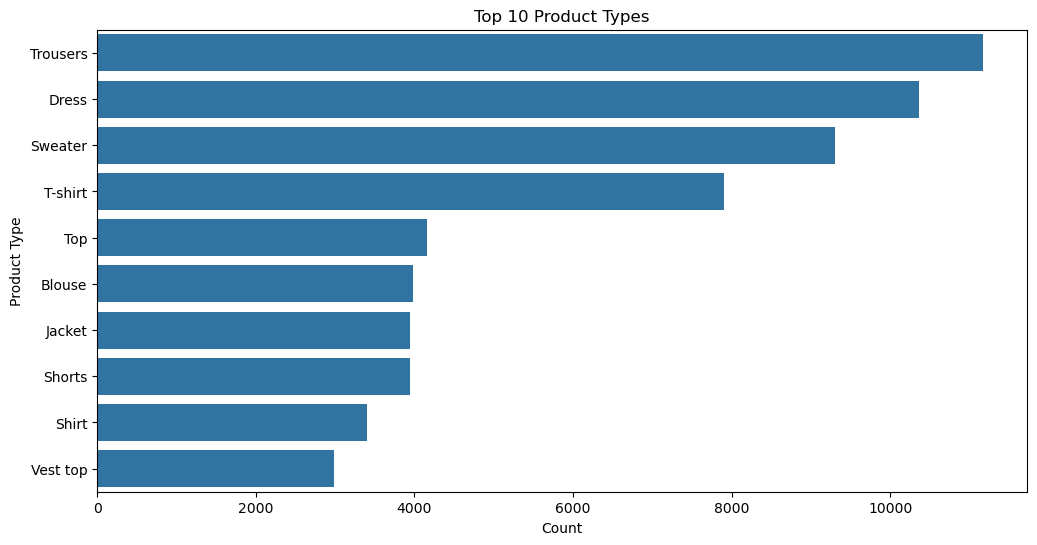

In [ ]:
### Top Product Types

plt.figure(figsize=(12,6))
sns.countplot(y=articles_df['product_type_name'], order=articles_df['product_type_name'].value_counts().head(10).index)
plt.title('Top 10 Product Types')
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()


- This plot shows the most frequently occurring product types sold by H&M.

    - Y-axis: Product Type Name
    - X-axis: Frequency (i.e., how many times each product type appears in articles.csv)

- Insights
    - This helps uncover customer preferences or product trends ‚Äî e.g., Trousers, Dress, Sweater, T-shirts...

- This plot helps you understand which product categories are most stocked or sold, which can feed into:
    - Popularity-based recommendation models
    - Inventory analysis
    - Trend analysis by season 

### 1.5 Top Color Groups

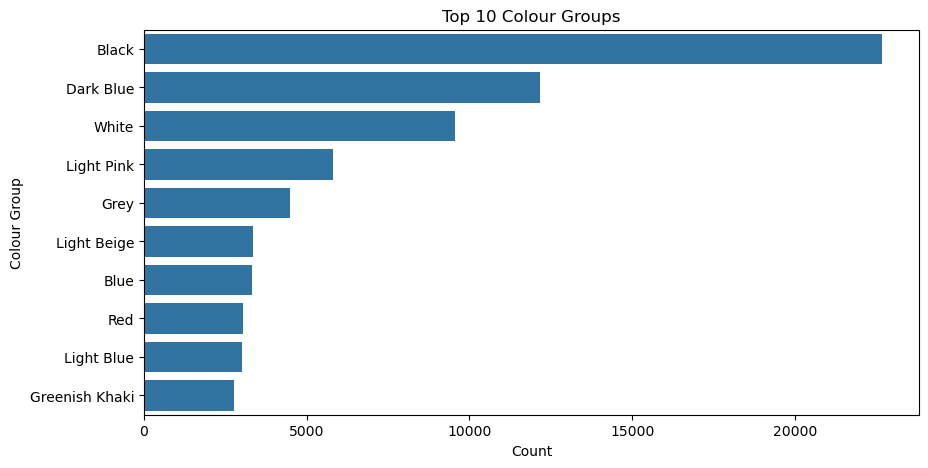

In [7]:
### Top Color Groups

plt.figure(figsize=(10,5))
sns.countplot(y=articles_df['colour_group_name'], order=articles_df['colour_group_name'].value_counts().head(10).index)
plt.title('Top 10 Colour Groups')
plt.xlabel('Count')
plt.ylabel('Colour Group')
plt.show()


This plot shows the most frequently occurring color groups in the product catalog.

- X-axis: Count (number of articles in that color group)

- Y-axis: colour_group_name

- Insights

This helps uncover customer preferences or product trends ‚Äî e.g., if black, white, and pink dominate, H&M might double down on those in marketing or stocking.

### 1.6 Index Group Distribution

In [8]:
### Index Groups

sns.countplot(data=articles_df, x='index_group_name')
plt.xticks(rotation=45)
plt.title('Index Group Distribution')
plt.show()


index_group_name typically refers to broader categories like:

- Ladieswear
- Menswear
- Baby/Children
- Divided (a sub-brand)

- Insights

This plot tells you which index groups dominate the product catalog. For example, if "Ladieswear" has the most SKUs, it could explain why female customers have more interactions ‚Äî useful for gender-segmented recommendations later on.

### 1.7 Categorical Cross-Analysis

In [12]:
cross_tab = pd.crosstab(articles_df['product_type_name'], articles_df['colour_group_name'])
cross_tab_normalized = cross_tab.div(cross_tab.sum(axis=1), axis=0)

# Show top product types
cross_tab_normalized.head(5).T.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Colour Distribution across Product Types")
plt.ylabel("Proportion")
plt.show()


For each of the top 5 product types, it visualizes how the different color groups are distributed proportionally. This helps us identify:

- Which colors dominate which product types

- Whether certain products are color-diverse or color-biased

For example:

- Users buys backpack with black color. H&M can stock up black color backpack more.

- Dresses may have more variety and bright shades

### 2.1 Load the Customer dataset

In [5]:
# Load the dataset
customers_df = pd.read_csv('customers/customers.csv')

# Display shape and sample
print(f"Shape: {customers_df.shape}")
customers_df.head()

Shape: (1371980, 7)


customer_id   FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  NaN     NaN   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  NaN     NaN   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  NaN     NaN   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...  NaN     NaN   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  1.0     1.0   

  club_member_status fashion_news_frequency   age  \
0             ACTIVE                   NONE  49.0   
1             ACTIVE                   NONE  25.0   
2             ACTIVE                   NONE  24.0   
3             ACTIVE                   NONE  54.0   
4             ACTIVE              Regularly  52.0   

                                         postal_code  
0  52043ee2162cf5aa7ee79974281641c6f11a68d276429a...  
1  2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...  
2  64f17e6a330a85798e4998f62d0930d14db8db1c054af6...  
3  5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...  
4  25fa5ddee9aac01b35208d01736e57942317d756b32ddd...

Customers data have 1371980 rows and 7 columns.

### 2.2 Basic info and Missing Values

In [7]:
# Overview of dataset
customers_df.info()

# Count missing values
missing_values = customers_df.isnull().sum().sort_values(ascending=False)
print("Missing values:\n", missing_values[missing_values > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355969 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB
Missing values:
 Active                    907576
FN                        895050
fashion_news_frequency     16011
age                        15861
club_member_status          6062
dtype: int64


- FN and Active columns:
    - These are binary indicator fields (1.0 = yes, NaN = no).
    - More than 65% missing ‚Üí likely safe to assume missing = 0.

- club_member_status, fashion_news_frequency, age:
    - Only ~1% missing ‚Üí can either:
       - Drop those rows
       - Impute (e.g., using mode for categorical, median for age)

### 2.3 Understands data column

In [8]:
# Unique values in each column
for col in customers_df.columns:
    print(f"{col}: {customers_df[col].nunique()} unique values")

customer_id: 1371980 unique values
FN: 1 unique values
Active: 1 unique values
club_member_status: 3 unique values
fashion_news_frequency: 3 unique values
age: 84 unique values
postal_code: 352899 unique values


### 2.4 Missing value handling

In [9]:
# Fill FN and Active missing values with 0
customers_df['FN'] = customers_df['FN'].fillna(0)
customers_df['Active'] = customers_df['Active'].fillna(0)

In [10]:
# Fill categorical columns with mode
customers_df['club_member_status'] = customers_df['club_member_status'].fillna(customers_df['club_member_status'].mode()[0])
customers_df['fashion_news_frequency'] = customers_df['fashion_news_frequency'].fillna(customers_df['fashion_news_frequency'].mode()[0])

In [11]:
# Fill age with median
customers_df['age'] = customers_df['age'].fillna(customers_df['age'].median())

In [12]:
# Confirm missing values are handled
print("Remaining missing values:\n", customers_df.isnull().sum())

Remaining missing values:
 customer_id               0
FN                        0
Active                    0
club_member_status        0
fashion_news_frequency    0
age                       0
postal_code               0
dtype: int64


### 2.5 Club Member Status Distribution

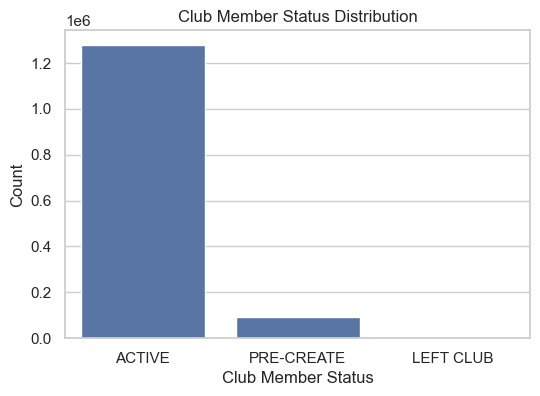

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(data=customers_df, x='club_member_status', order=customers_df['club_member_status'].value_counts().index)
plt.title("Club Member Status Distribution")
plt.xlabel("Club Member Status")
plt.ylabel("Count")
plt.show()

- Common values usually are:
    - 'ACTIVE'
    - 'PRE-CREATE' (accounts created but not yet fully registered)
    - 'LEFT CLUB' (past members)

- It helps you understand the engagement level of customers based on their loyalty status:

    - If most are 'ACTIVE', your recommender model will have stronger behavior signals.
    - If many are 'PRE-CREATE', you might want to exclude them from modeling due to cold-start risk.
    - If 'LEFT CLUB' is significant, you could analyze churn trends.

### 2.6 Fashion News Frequency

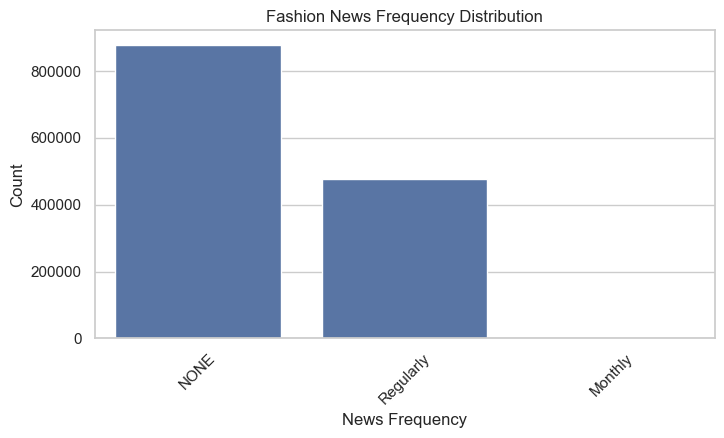

In [10]:
plt.figure(figsize=(8,4))
sns.countplot(data=customers_df, x='fashion_news_frequency', order=customers_df['fashion_news_frequency'].value_counts().index)
plt.title("Fashion News Frequency Distribution")
plt.xlabel("News Frequency")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

- Plots a bar chart showing how frequently customers receive H&M‚Äôs fashion news (email/notifications).

- This feature can indicate a customer's interest level or marketing engagement:

    - 'Regularly': Highly engaged
    - 'Monthly': Less engaged
    - 'NONE', 'None', 'NA': Not interested (possible churn candidates or cold-start users)

- Insight for Recommendations:
    - High-frequency readers are better candidates for new arrivals, promotions, or trend-based recommenders.
    - Non-subscribers may need behavior-based models or basic popularity recommenders.

### 2.7 Age Distribution

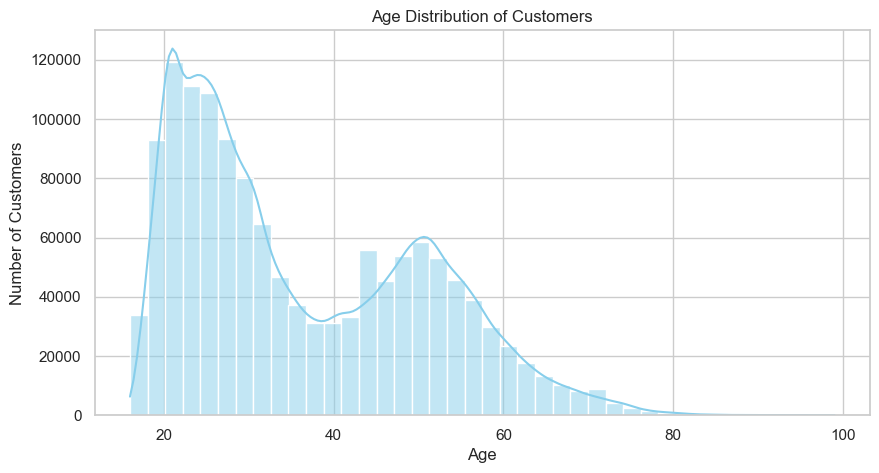

In [15]:
plt.figure(figsize=(10,5))
sns.histplot(customers_df['age'].dropna(), bins=40, kde=True, color='skyblue')
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

- Peak age group: Around 20‚Äì25 years, followed by 25‚Äì30
    - Likely indicates H&M‚Äôs primary customer base is young adults.

- Second hump (~50‚Äì60 years):
    - Indicates a secondary segment of mature adults or parents.

- Right-skewed tail:
    - Shows declining participation from customers over 60.

- Identifies the most common age groups shopping at H&M.

- Hints at target demographics:

    - Teens & young adults (15‚Äì30)
    - Parents (30‚Äì45)
    - Seniors (60+)

- This can help in:

    - Personalizing recommendations by age group.
    - Marketing segmentation (e.g., emails/promotions).
    - Product preferences by age range.

### 2.8 Boxplot: Age vs Club Member Status

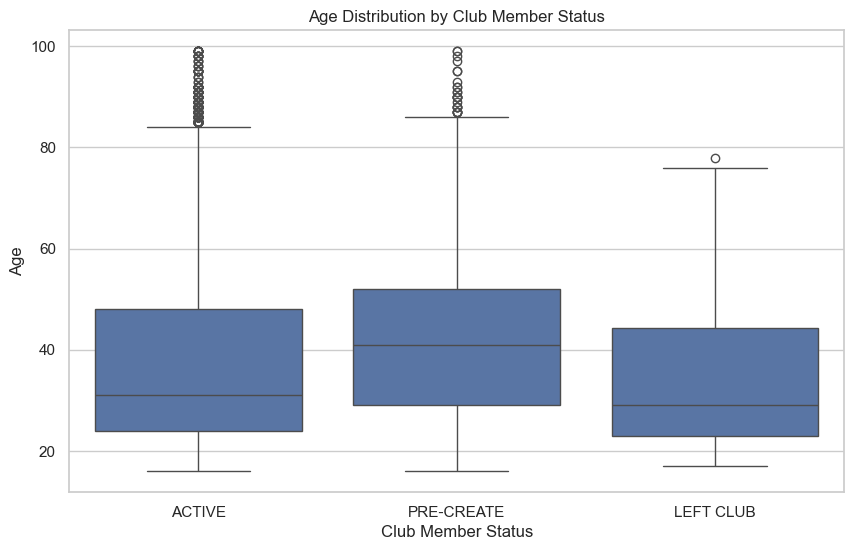

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(data=customers_df, x='club_member_status', y='age')
plt.title("Age Distribution by Club Member Status")
plt.xlabel("Club Member Status")
plt.ylabel("Age")
plt.show()

- This plot helps you understand if certain age groups are more or less likely to be active members.

- Insights
    -   'ACTIVE' members may have a lower median age ‚Üí brand appeals more to youth.

    -   'LEFT CLUB' may skew older, possibly indicating churn in older segments.

    -   'PRE-CREATE' accounts may have wider age spread or cluster among young users.

### 2.9 Grouped Status

- Average Age by Club Member Status

In [6]:
#Average Age by Club Member Status
print(customers_df.groupby("club_member_status")["age"].mean())

club_member_status
ACTIVE        36.077991
LEFT CLUB     33.989224
PRE-CREATE    40.885313
Name: age, dtype: float64


- Insights
    - ACTIVE members have the youngest average age, which aligns with H&M‚Äôs youthful branding.
    - PRE-CREATE accounts are the oldest ‚Äî these might be test accounts, gift buyers, or infrequent users.
    - LEFT CLUB members are younger than active ones ‚Äî possibly indicating early churn or lower brand stickiness among younger users.

- Fashion News Frequency by Club Member Status

In [7]:
#Fashion News Frequency by Club Member Status
print(customers_df.groupby("club_member_status")["fashion_news_frequency"].value_counts(normalize=True))

club_member_status  fashion_news_frequency
ACTIVE              NONE                      0.625499
                    Regularly                 0.373883
                    Monthly                   0.000617
LEFT CLUB           NONE                      0.982869
                    Regularly                 0.017131
PRE-CREATE          NONE                      0.935695
                    Regularly                 0.063656
                    Monthly                   0.000649
Name: proportion, dtype: float64


- ACTIVE members have strong marketing engagement ‚Äî over 37% opt-in to regular updates.
- LEFT CLUB members show very low interest ‚Äî nearly all unsubscribed from fashion news.
- PRE-CREATE users are largely disengaged ‚Äî similar to LEFT CLUB in behavior.

### 3.1 Load the transactions dataset

In [9]:
# Load the dataset
transactions_df = pd.read_csv('transactions_train/transactions_train.csv', parse_dates=['t_dat'])

# Display shape and sample
print(f"Shape: {transactions_df.shape}")
transactions_df.head()

Shape: (31788324, 5)


t_dat                                        customer_id  article_id  \
0 2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   663713001   
1 2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   541518023   
2 2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   505221004   
3 2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687003   
4 2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687004   

      price  sales_channel_id  
0  0.050831                 2  
1  0.030492                 2  
2  0.015237                 2  
3  0.016932                 2  
4  0.016932                 2

Transactions dataset have 31788324 rows and 5 columns.

### 3.2 Basic Info and Missing values

In [21]:
# Overview of dataset
transactions_df.info()

# Count missing values
missing_values = transactions_df.isnull().sum().sort_values(ascending=False)
print("Missing values:\n", missing_values[missing_values > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       object        
 2   article_id        int64         
 3   price             float64       
 4   sales_channel_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.2+ GB
Missing values:
 Series([], dtype: int64)


### 3.3 Understand the data column

In [22]:
# Unique values in each column
for col in transactions_df.columns:
    print(f"{col}: {transactions_df[col].nunique()} unique values")

t_dat: 734 unique values
customer_id: 1362281 unique values
article_id: 104547 unique values
price: 9857 unique values
sales_channel_id: 2 unique values


### 3.4 Sales over time

In [ ]:
# Convert 't_dat' to datetime and extract week, month, and year
transactions_df['t_dat'] = pd.to_datetime(transactions_df['t_dat'])
transactions_df['week'] = transactions_df['t_dat'].dt.isocalendar().week
transactions_df['month'] = transactions_df['t_dat'].dt.month
transactions_df['year'] = transactions_df['t_dat'].dt.year

In [11]:
transactions_df.head()

t_dat                                        customer_id  article_id  \
0 2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   663713001   
1 2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   541518023   
2 2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   505221004   
3 2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687003   
4 2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687004   

      price  sales_channel_id  week  month  year  
0  0.050831                 2    38      9  2018  
1  0.030492                 2    38      9  2018  
2  0.015237                 2    38      9  2018  
3  0.016932                 2    38      9  2018  
4  0.016932                 2    38      9  2018

In [12]:
weekly_sales = transactions_df.groupby(['year', 'week']).size().reset_index(name='transactions')

In [25]:
plt.figure(figsize=(14,6))
sns.lineplot(data=weekly_sales, x='week', y='transactions', hue='year')
plt.title("Weekly Transaction Volume")
plt.xlabel("Week Number")
plt.ylabel("Number of Transactions")
plt.show()

- Insights
    -  Data spans 2018 to 2020
        - A massive sales spike is observed between weeks 23‚Äì26, likely related to seasonal sales (e.g., summer sale or promotions).
        - A visible dip at the end of each year ‚Äî typical for retail (e.g., post-holiday slowdown).
        - 2020 shows lower total volume than 2019 ‚Äî possibly impacted by COVID-19 disruptions.

### 3.5 Price Distribution

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(transactions_df['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

| Observation                                   | Insight                                                                     |
| --------------------------------------------- | --------------------------------------------------------------------------- |
| Most prices are **clustered around 0.05‚Äì0.2** | Indicates items are sold at heavy discounts (or original pricing is scaled) |
| Distribution is **right-skewed**              | Very few items have higher price values                                     |
| Long **tail** at higher prices                | Small segment of premium/luxury items                                       |


- Prices are scaled (not in actual currency). 
    - According to H&M documentation: Price is likely the final sale price / base price, e.g., 0.050 may represent ‚Ç¨5.00 if base is ‚Ç¨100.

### 3.6 Sales channel distribution

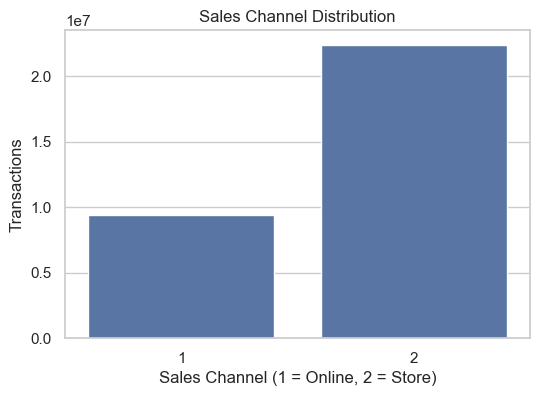

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(data=transactions_df, x='sales_channel_id')
plt.title("Sales Channel Distribution")
plt.xlabel("Sales Channel (1 = Online, 2 = Store)")
plt.ylabel("Transactions")
plt.show()

- Plots the count of transactions by sales_channel_id:
    - 1 = Online
    - 2 = Offline (physical store)

| Channel | Meaning        | Insights                 |
| ------- | -------------- | ------------------------ |
| 1       | Online         | E-commerce penetration   |
| 2       | Physical Store | Retail customer behavior |


- Insights
    - If channel 2 dominates, H&M‚Äôs brick-and-mortar is the main driver.
    - If channel 1 is increasing over time, it shows digital growth.

### 3.7 Top 10 purchased articles

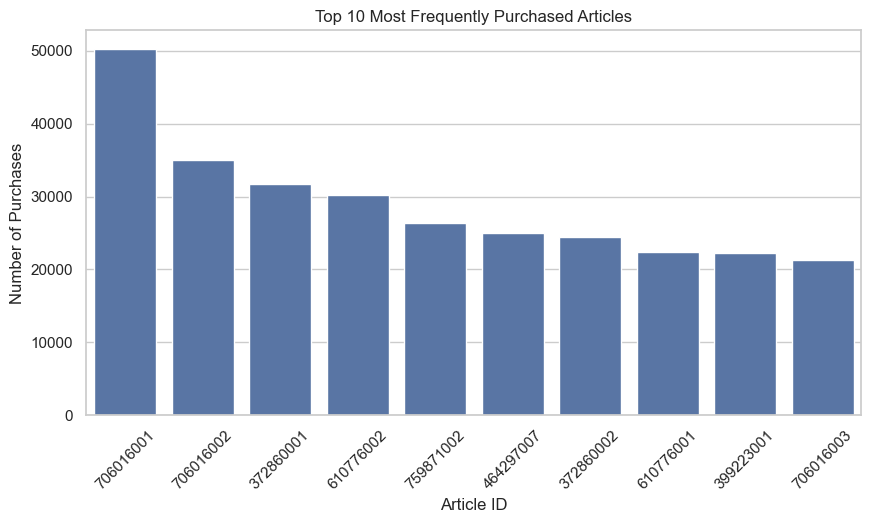

In [29]:
top_articles = transactions_df['article_id'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_articles.index.astype(str), y=top_articles.values)
plt.title("Top 10 Most Frequently Purchased Articles")
plt.xlabel("Article ID")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.show()

- Displays a bar plot showing:
    - X-axis: article_id (top 10)
    - Y-axis: Number of times each article was purchased

- These articles form the "cold-start" recommendation base for:
    - New users
    - Anonymous users
    - Low-activity customers

- Example:
    - If article 706016001 has 50,000 purchases, it's a safe recommendation for anyone not seen before.

### 3.8 Top 10 most active customers

In [31]:
top_customers = transactions_df['customer_id'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.index, y=top_customers.values)
plt.title("Top 10 Most Active Customers")
plt.xlabel("Customer ID")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=90)
plt.show()

| Insight                                                          | Use                                   |
| ---------------------------------------------------------------- | ------------------------------------- |
| Who are your **most loyal customers**                            | Prioritize in marketing/early rollout |
| Customer engagement pattern                                      | High activity = high-value targets    |

- Business Ideas:
    - Offer exclusive collections or rewards to these customers.
    - Train models to learn from their preferences.

### 3.9 Average price per article

In [33]:
avg_price_per_article = transactions_df.groupby('article_id')['price'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Most Expensive Articles (Avg Price):")
print(avg_price_per_article)


Top 10 Most Expensive Articles (Avg Price):
article_id
860884001    0.506780
776442001    0.506780
613539001    0.506780
916300001    0.506081
916300002    0.501021
839478002    0.491999
839478001    0.491568
713219001    0.471904
810872001    0.463068
820023001    0.456102
Name: price, dtype: float64


- These articles consistently sell at higher prices, potentially representing:
    - Premium collections
    - Outerwear, shoes, or special edition pieces
    - Possibly online exclusives or limited-run items

### 4.1 Merge all dataset (articles, customers and transactions)

In [ ]:
# Merge transactions with articles
tx_articles = transactions_df.merge(articles_df, on='article_id', how='left')

# Merge with customers
full_df = tx_articles.merge(customers_df, on='customer_id', how='left')

full_df.head()


### 4.2 Most Purchased Product Categories by Age Group

C:\Users\sandeep.palit\AppData\Local\Temp\ipykernel_25704\3937103585.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_by_age = full_df.groupby(['age_group', 'product_group_name']).size().unstack().fillna(0)


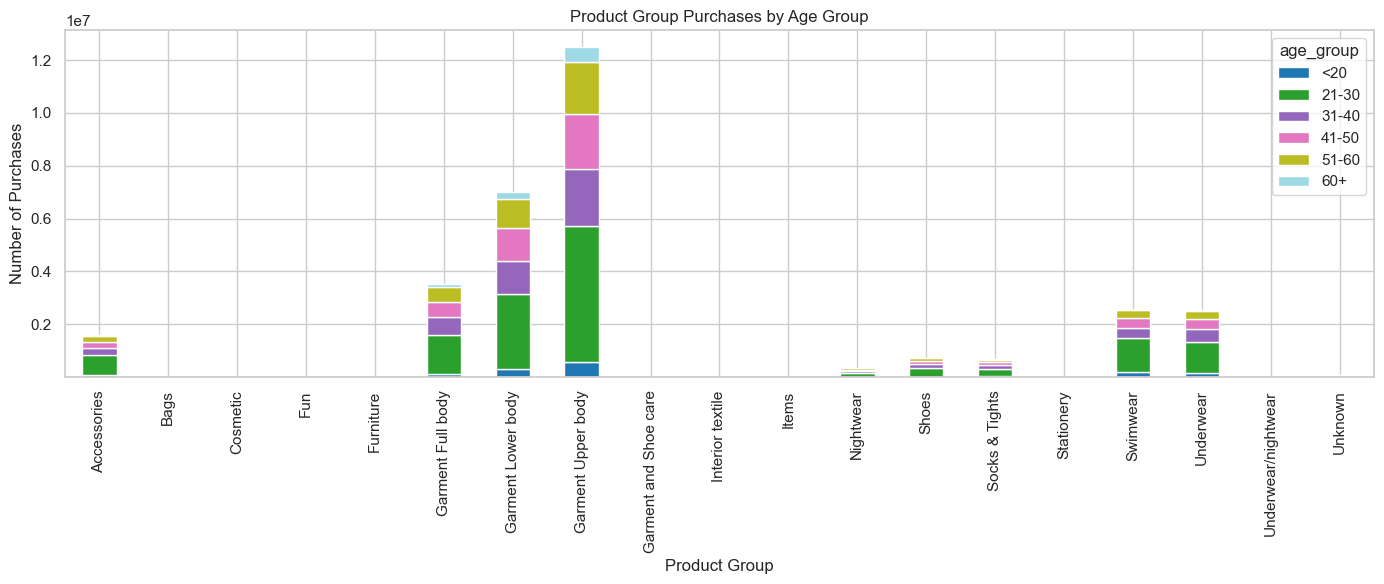

In [35]:
# Create age bins
full_df['age_group'] = pd.cut(full_df['age'], bins=[0, 20, 30, 40, 50, 60, 100], 
                              labels=['<20', '21-30', '31-40', '41-50', '51-60', '60+'])

# Group and count
category_by_age = full_df.groupby(['age_group', 'product_group_name']).size().unstack().fillna(0)

# Visualize
category_by_age.T.plot(kind='bar', stacked=True, figsize=(14,6), colormap='tab20')
plt.title("Product Group Purchases by Age Group")
plt.ylabel("Number of Purchases")
plt.xlabel("Product Group")
plt.tight_layout()
plt.show()

| Feature          | Insight                                             |
| ---------------- | --------------------------------------------------- |
| **X-axis**       | Product groups (e.g., Shoes, Trousers, Accessories) |
| **Stacked Bars** | Shows age-wise contribution to each product         |
| **Legend**       | Age groups: `<20`, `21‚Äì30`, etc.                    |
| **Y-axis**       | Number of purchases in that product group           |


- Insights

    1. Dominance of Garment Upper Body
        - Most popular across all age groups, especially for 21‚Äì30 and 31‚Äì40
        - Suggests frequent buys like Garments Upper body, Garment lower body, Garment full body, Swimwear, Underwear 

    2. Age Group 21‚Äì30 is the Most Active
        - Highest contribution across nearly all categories

- Notable Trends

| Product Group        | Strong Age Segments            |
| -------------------- | ------------------------------ |
| Underwear & Swimwear | 21‚Äì30, 31‚Äì40                   |
| Shoes & Accessories  | Mostly 21‚Äì40                   |
| Full Body Garments   | 21‚Äì40, then tapers after 50    |
| Nightwear            | More evenly spread across ages |


### 4.3 Average Spending per Custome

In [37]:
avg_spending = full_df.groupby('customer_id')['price'].sum().sort_values(ascending=False)
avg_spending

customer_id
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    57.676407
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    50.921186
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296    49.967169
191071b0e1f2e94a557f1a0b4cea3de55faf1581b1f46466ffe90664f73ec96e    47.682017
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    47.662000
                                                                      ...    
7ba686bcc845f1ea49b00e32c98cf6d9132fc29395a580e81bb4bf73b3affcdb     0.000847
8f06cf200f1fbc9c8a91ce6783a18ccae68463a46edabda52a6a2c1a20a160c5     0.000847
b36a2dac88d1f435dd1dae7eb406a6cbde18118709fef527a1ac4fc177c64be0     0.000847
6ca58871020638aa7a7341b8108bf94c6de9258dde91dc3a83b35af8c2539dc6     0.000847
a1c392de2f181fe9575721d44a6f115427e550e5feabd1a690ff1df27e79d15b     0.000763
Name: price, Length: 1362281, dtype: float64

| Insight             | Description                                                                                      |
| ------------------- | ------------------------------------------------------------------------------------------------ |
| Top customers    | The top spender (`be1981...d91b`) spent \~57.68 units total                                      |
| Bottom customers | Many spent as little as \~0.0008 ‚Äî single tiny transaction                                       |
| Currency note    | Prices are normalized, likely due to **internal scaling** in H\&M's dataset (not actual USD/EUR) |


### 4.4 Repeat Purchase Rate

In [39]:
repeat_buyers = full_df.groupby('customer_id')['article_id'].nunique()
repeat_rate = (repeat_buyers > 1).sum() / repeat_buyers.count()
print(f"Repeat purchase rate: {repeat_rate:.2%}")

Repeat purchase rate: 88.63%


- Insights
    - A very high repeat rate ‚Äî nearly 9 in 10 customers came back and purchased more than one unique item.
    - Suggests strong brand stickiness or customer loyalty.
    - Reinforces the value of personalized recommendation systems ‚Äî customers are likely to return, so tailoring future suggestions is worthwhile.

### 4.5 Time-Based Purchasing Trends

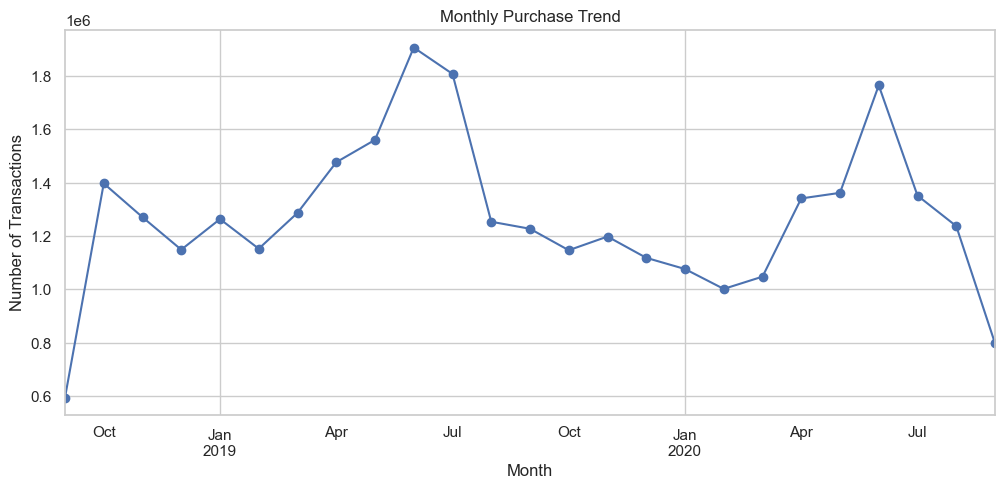

In [40]:
# Merge and plot
tx_articles = transactions_df.merge(articles_df, on='article_id')
tx_articles['month'] = tx_articles['t_dat'].dt.to_period('M')
tx_articles.groupby('month').size().plot(kind='line', marker='o', figsize=(12, 5))
plt.title("Monthly Purchase Trend")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.show()

| Period                | Insight                                                               |
| --------------------- | --------------------------------------------------------------------- |
| **May‚ÄìJul 2019**   | Peak sales period ‚Äî likely due to summer collections or campaigns     |
| **Early 2020**     | Gradual decline ‚Äî possible COVID-19 impact                            |
| **May 2020 spike** | A quick recovery ‚Äî likely due to **online sales** or clearance events |
| **Aug‚ÄìSep 2020**   | Noticeable drop ‚Äî possible end of season or data cutoff               |


### 4.6 Loyal Customers

In [42]:
# Number of transactions per customer
loyal_customers = (
    transactions_df.groupby('customer_id')['article_id']
    .count()
    .reset_index(name='num_transactions')
    .sort_values(by='num_transactions', ascending=False)
)

# Top 10 most loyal customers
loyal_customers.head(10)


customer_id  num_transactions
1011710  be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...              1895
962395   b4db5e5259234574edfff958e170fe3a5e13b6f146752c...              1441
391840   49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05...              1364
885174   a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...              1361
1090960  cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed...              1237
456062   55d15396193dfd45836af3a6269a079efea339e875eff4...              1208
1028179  c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27c...              1170
755132   8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d...              1169
20162    03d0011487606c37c1b1ed147fc72f285a50c05f00b971...              1157
578832   6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2...              1143

In [43]:
# Total spend per customer
customer_spend = (
    transactions_df.groupby('customer_id')['price']
    .sum()
    .reset_index(name='total_spend')
    .sort_values(by='total_spend', ascending=False)
)

# Top 10 highest spenders
customer_spend.head(10)

customer_id  total_spend
1011710  be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...    57.676407
885174   a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...    50.921186
20162    03d0011487606c37c1b1ed147fc72f285a50c05f00b971...    49.967169
133564   191071b0e1f2e94a557f1a0b4cea3de55faf1581b1f464...    47.682017
962395   b4db5e5259234574edfff958e170fe3a5e13b6f146752c...    47.662000
578832   6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2...    47.247797
1283457  f137c16fd175271922dad4006565503952f24750a57388...    41.688661
1242262  e97c3a6c680cd3569df10f901a61fdffaf8f70300f6adf...    41.482051
714142   863f0e03da282ae32a76775ce55d8a4605a85c84a26066...    41.414102
1090960  cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed...    41.327051

In [44]:
loyalty_df = loyal_customers.merge(customer_spend, on='customer_id')
loyalty_df.head(10)

customer_id  num_transactions  \
0  be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...              1895   
1  b4db5e5259234574edfff958e170fe3a5e13b6f146752c...              1441   
2  49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05...              1364   
3  a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...              1361   
4  cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed...              1237   
5  55d15396193dfd45836af3a6269a079efea339e875eff4...              1208   
6  c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27c...              1170   
7  8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d...              1169   
8  03d0011487606c37c1b1ed147fc72f285a50c05f00b971...              1157   
9  6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2...              1143   

   total_spend  
0    57.676407  
1    47.662000  
2    30.126814  
3    50.921186  
4    41.327051  
5    38.234102  
6    34.510153  
7    39.759712  
8    49.967169  
9    47.247797

C:\Users\sandeep.palit\AppData\Local\Temp\ipykernel_25704\2723501067.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_id', y='num_transactions', data=top_loyal, palette='Blues_d')
C:\Users\sandeep.palit\AppData\Local\Temp\ipykernel_25704\2723501067.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


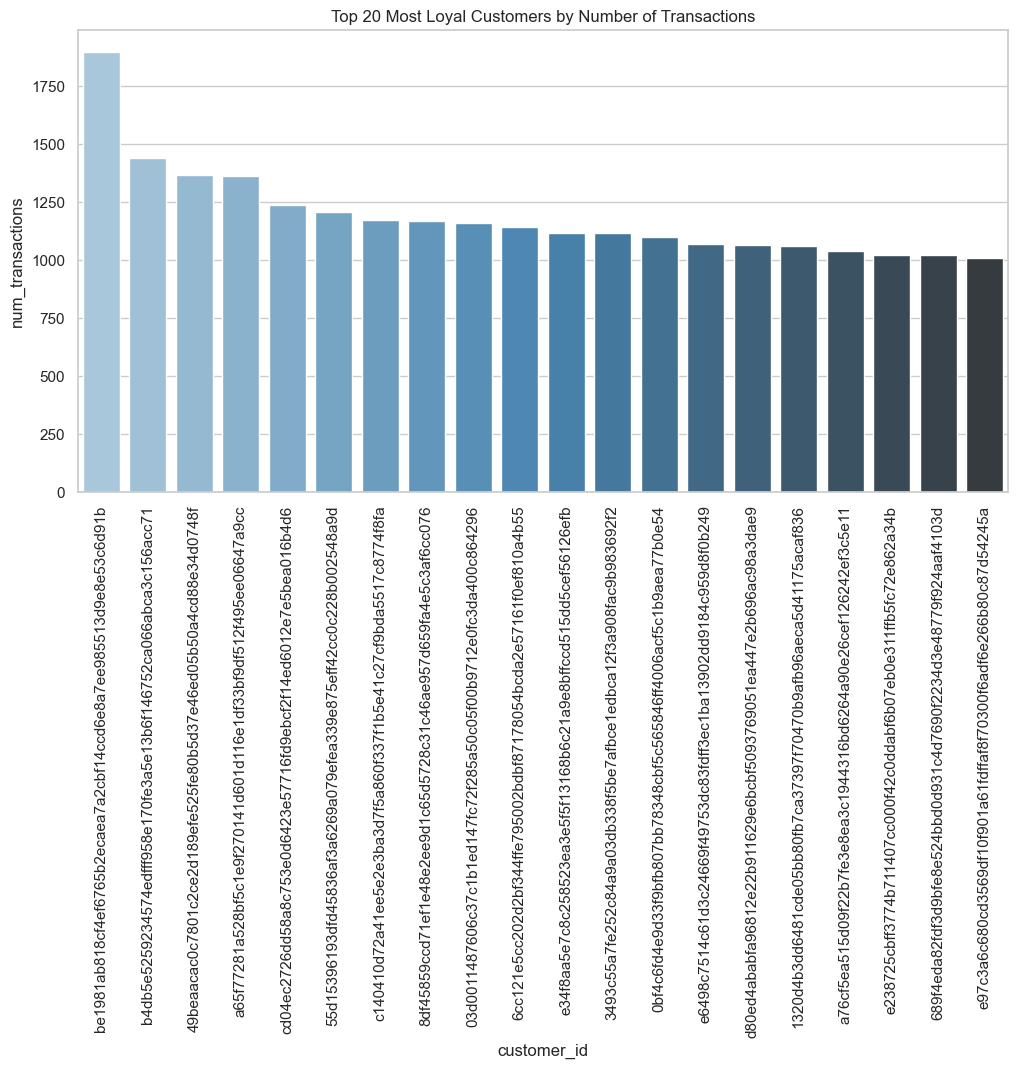

In [ ]:
top_loyal = loyalty_df.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x='customer_id', y='num_transactions', data=top_loyal, palette='Blues_d')
plt.xticks(rotation=90)
plt.title('Top 20 Most Loyal Customers by Number of Transactions')
plt.tight_layout()
plt.show()

| Insight                      | Description                                                                                                                         |
| ---------------------------- | ----------------------------------------------------------------------------------------------------------------------------------- |
| Top customer              | The leftmost bar (e.g., customer ID starting with `bc1981...be`) has made **\~1800+ transactions**, indicating **very high loyalty**. |
| Consistency               | The top 20 customers all show strong engagement ‚Äî **many over 1000+ transactions**.                                                 |
| Personalization Potential | These customers are ideal candidates for **hyper-personalized recommendations**, early access sales, or loyalty rewards.            |


### 4.6 Demography Analysis

### 4.6.1 Top Regions by Number of Customers

In [49]:
# Top 10 postal codes with the most customers
top_postal_customers = customers_df['postal_code'].value_counts().head(10).reset_index()
top_postal_customers.columns = ['postal_code', 'num_customers']
top_postal_customers

postal_code  num_customers
0  2c29ae653a9282cce4151bd87643c907644e09541abc28...         120303
1  cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...            261
2  714976379549eb90aae4a71bca6c7402cc646ae7c40f6c...            159
3  7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...            157
4  5b7eb31eabebd3277de632b82267286d847fd5d44287ee...            156
5  1f5bd429acc88fbbf24de844a59e438704aa8761bc7b99...            154
6  9d5787501bf1c77592156ba51eab13f4a2670c80768643...            141
7  a1959a16bf167858c93a66ec2a330644512b25fb10f97e...            138
8  087a46b65170845b4a55226ff1eb748ce7843d4b637cbe...            134
9  4d22901a97bd952bb92cdd31b38c39b41dd3250a735cab...            132

- H&M, like many companies, anonymizes sensitive customer data (like location) to comply with GDPR and other privacy regulations.

- Insights
    - The top postal code (likely synthetic) holds a huge customer base ‚Äî could indicate:
        - A default value used for anonymization.
        - A major customer hub or a system placeholder.

### 4.6.2 Top Regions by Number of Transactions

In [52]:
# Join transactions with customers to get postal_code
tx_postal = transactions_df.merge(customers_df[['customer_id', 'postal_code']], on='customer_id', how='left')

# Aggregate transactions by postal_code
postal_txn = tx_postal['postal_code'].value_counts().head(10).reset_index()
postal_txn.columns = ['postal_code', 'num_transactions']
postal_txn


postal_code  num_transactions
0  2c29ae653a9282cce4151bd87643c907644e09541abc28...            625893
1  a5ca21aefc3cf90afd9b09faf3b0f8f3c423d4f1cfb4c2...              5840
2  1f5bd429acc88fbbf24de844a59e438704aa8761bc7b99...              5462
3  7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...              5444
4  5b7eb31eabebd3277de632b82267286d847fd5d44287ee...              5332
5  2790324c84cdb8ba471be2a199cfb5103bbe1ab10883a0...              4360
6  a1959a16bf167858c93a66ec2a330644512b25fb10f97e...              4257
7  9d5787501bf1c77592156ba51eab13f4a2670c80768643...              4202
8  cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...              3585
9  3eb41c8511d4e04fc0f02452e6e15d206d0c0e9d0f25ff...              3530

-   The first postal code again dominates (625k+ transactions) ‚Äî this may be a default or synthetic placeholder.
-   Others follow a more natural distribution (3k‚Äì6k range), likely representing real customer regions.
-   These high-transaction regions are key for:
    - Targeted marketing
    - Inventory placement
    - Local promotions